In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# Common Imports:
import pandas as pd
import numpy as np
import os

# To Plot Figures:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
%matplotlib inline 

In [3]:
# allowing for any single variable to print out without using the print statement:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
# To allow markdowns in Python Cells:
from IPython.display import display, Markdown

### First, we will load our images from Kaggle Dataset and create our test and train X and Y values.

In [5]:
# Path to access images
from pathlib import Path

# in-built keras image pre-processing library
from keras.preprocessing import image

In [7]:
# Path to folders with training data
parasitized_path = Path('../input/cell-images-for-detecting-malaria/cell_images') / 'Parasitized'
not_parasitized_path = Path('../input/cell-images-for-detecting-malaria/cell_images') / 'Uninfected'

# making sure the directories exist
parasitized_path.is_dir()
not_parasitized_path.is_dir()

True

True

In [8]:
# initializing the lists of images (X) and labels (Y)
images = []
labels = []

In [9]:
# import library to resize images:
from skimage import transform

# setting the new shape of image:
new_shape = (50, 50, 3)

###### Lets import all the non infected images 

In [10]:
import warnings;
warnings.filterwarnings('ignore');

# Load all the non-malaria images and setting their Y label as 0
for img in not_parasitized_path.glob("*.png"):
    
    # Load the image from disk
    img = image.load_img(img)

    # Convert the image to a numpy array
    image_array = image.img_to_array(img)
    
    # resize the image (must be done after it has turned into a np array):
    image_array = transform.resize(image_array, new_shape, anti_aliasing=True)
    
    # scaling the image data to fall between 0-1 since images have 255 brightness values:
    image_array /= 255

    # Add the image to the list of images
    images.append(image_array)

    # For each 'not parasitized' image, the expected value should be 0
    labels.append(0)

Text(0.5, 1.0, 'Sample Uninfected Cell')

'Dimensions of image:'

(50, 50, 3)

'Images / Labels we have imported thus far:'

13779

13779

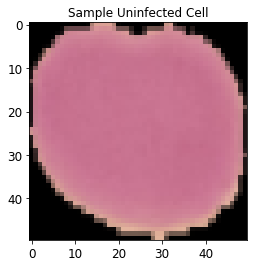

In [11]:
plt.imshow(images[1])
plt.title('Sample Uninfected Cell')
"Dimensions of image:"
images[1].shape

"Images / Labels we have imported thus far:"
len(images)
len(labels)

###### Lets import all the infected images 

In [12]:
# Load all the malaria images and setting their Y label as 1
for img in parasitized_path.glob("*.png"):
    
    # Load the image from disk
    img = image.load_img(img)

    # Convert the image to a numpy array
    image_array = image.img_to_array(img)
    
    # resize the image (must be done after it has turned into a np array):
    image_array = transform.resize(image_array, new_shape, anti_aliasing=True)
    
    # scaling the image data to fall between 0-1 since images have 255 brightness values:
    image_array /= 255

    # Add the image to the list of images
    images.append(image_array)

    # For each 'parasitized' image, the expected value should be 1
    labels.append(1)

Let's take a look at an infected cell:

Text(0.5, 1.0, 'Sample Infected Cell')

'Dimensions of image:'

(50, 50, 3)

'Images / Labels we have imported thus far:'

27558

27558

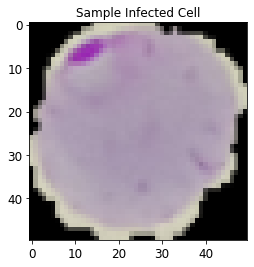

In [13]:
plt.imshow(images[-1])
plt.title('Sample Infected Cell')
"Dimensions of image:"
images[-1].shape

"Images / Labels we have imported thus far:"
len(images)
len(labels)

Here, we save and load the np data so we don't need to run through all the pre-processing from scratch next time.

In [14]:
# memory dump
import gc
gc.collect()

4477

Now, we randomly shuffle the images and labels (while respecting their order of course) before we split into training and testing sets:

In [15]:
from sklearn.utils import shuffle
images, labels = shuffle(images, labels)

'1 means it is infected:'

1

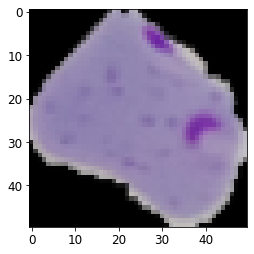

In [16]:
# checking to make sure that the order is still in place:
plt.imshow(images[-7])
"1 means it is infected:"
labels[-7]

In [17]:
# Create a single numpy array with all the images we loaded (list to np array)
x_data = np.array(images)

# Also convert the labels to a numpy array from a list
y_data = np.array(labels)

In [18]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, random_state = 0)

In [19]:
# type convert the test and training data:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [20]:
f'X_train shape: {X_train.shape}'
f'X_test.shape: {X_test.shape}'

'X_train shape: (22046, 50, 50, 3)'

'X_test.shape: (5512, 50, 50, 3)'

In [21]:
f'Y_train shape: {y_train.shape}'
f'Y_test.shape: {y_test.shape}'

'Y_train shape: (22046,)'

'Y_test.shape: (5512,)'

In [22]:
y_train[0:3]

array([0, 0, 0])

In [23]:
# one hot encoding Y:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [24]:
y_train[0:3]

array([[1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [25]:
import h5py

with h5py.File('X_train.hdf5', 'w') as f:
    dset = f.create_dataset("default", data=X_train)